# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [7]:
a = np.array([1, 3, 2, 4])

In [8]:
a

array([1, 3, 2, 4])

In [9]:
type(a)

numpy.ndarray

In [10]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [11]:
A

array([[3, 1, 2],
       [2, 3, 4]])

In [12]:
A[0]

array([3, 1, 2])

In [13]:
C[2, 0]

4

In [14]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [15]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [16]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [17]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [18]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [19]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [20]:
# A + B

In [21]:
# A * B

### Dot product

In [22]:
A.shape

(2, 3)

In [23]:
B.shape

(3, 2)

In [24]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [25]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [26]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [27]:
C.shape

(6, 2)

In [28]:
A.shape

(2, 3)

In [29]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [30]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [31]:
df = pd.read_csv('../data/banknotes.csv')

In [32]:
df.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [33]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [34]:
import seaborn as sns

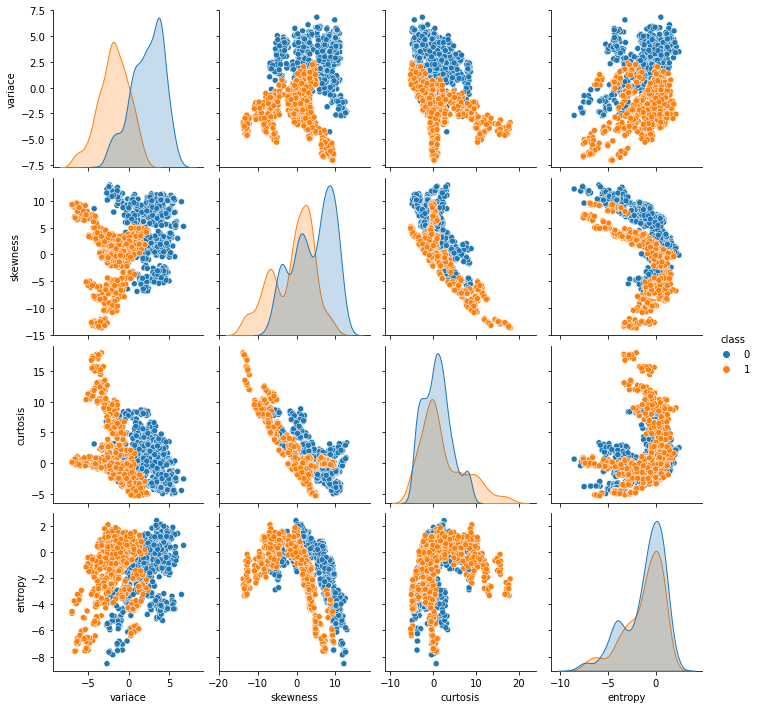

In [27]:
sns.pairplot(df, hue="class");

#### Baseline model

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [36]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [37]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99272727, 0.98905109, 0.99635036, 0.99635036])

### Logistic Regression Model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [39]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [46]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
30/30 [==============================] - 1s 3ms/step - loss: 0.5772 - accuracy: 0.6906
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7510
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.8073
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.8500
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8823
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8938
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.9094
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.9094: 0s - loss: 0.3882 - accuracy: 0.91
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.9115
Epoch 10/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3549 - 

In [47]:
historydf = pd.DataFrame(history.history, index=history.epoch)

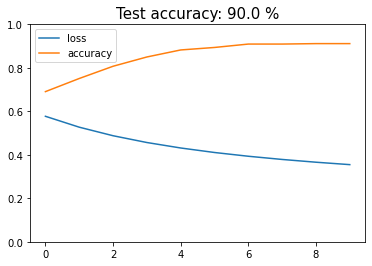

In [48]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [49]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)

In [51]:
historydf

loss  accuracy      loss  accuracy      loss  accuracy      loss  \
0  0.928993  0.411458  0.544356  0.782292  0.425176  0.836458  0.306113   
1  0.738052  0.527083  0.330551  0.944792  0.282028  0.928125  0.131137   
2  0.611445  0.673958  0.272006  0.943750  0.222593  0.943750  0.096884   
3  0.528611  0.784375  0.237683  0.948958  0.186923  0.957292  0.081131   
4  0.473135  0.842708  0.213435  0.951042  0.162793  0.963542  0.072058   
5  0.434009  0.880208  0.194824  0.957292  0.145622  0.965625  0.065664   
6  0.404815  0.894792  0.179993  0.962500  0.132606  0.967708  0.061230   
7  0.381984  0.901042  0.167868  0.964583  0.122543  0.969792  0.057898   
8  0.363266  0.905208  0.157727  0.965625  0.114454  0.969792  0.054975   
9  0.347578  0.912500  0.149128  0.966667  0.107708  0.969792  0.052862   

   accuracy  
0  0.886458  
1  0.965625  
2  0.972917  
3  0.977083  
4  0.979167  
5  0.979167  
6  0.980208  
7  0.981250  
8  0.981250  
9  0.981250

In [52]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [53]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.928993  0.411458  0.544356  0.782292  0.425176  0.836458   
1              0.738052  0.527083  0.330551  0.944792  0.282028  0.928125   
2              0.611445  0.673958  0.272006  0.943750  0.222593  0.943750   
3              0.528611  0.784375  0.237683  0.948958  0.186923  0.957292   
4              0.473135  0.842708  0.213435  0.951042  0.162793  0.963542   
5              0.434009  0.880208  0.194824  0.957292  0.145622  0.965625   
6              0.404815  0.894792  0.179993  0.962500  0.132606  0.967708   
7              0.381984  0.901042  0.167868  0.964583  0.122543  0.969792   
8              0.363266  0.905208  0.157727  0.965625  0.114454  0.969792   
9              0.347578  0.912500  0.149128  0.966667  0.107708  0.969792   

learning_rate      0.50            
metric             loss  accuracy  
0              0.306113  0.886458  
1              0.131137  0.965625  
2              0.096884  0.972917  
3              0.081131  0.977083  
4              0.072058  0.979167  
5              0.065664  0.979167  
6              0.061230  0.980208  
7              0.057898  0.981250  
8              0.054975  0.981250  
9              0.052862  0.981250

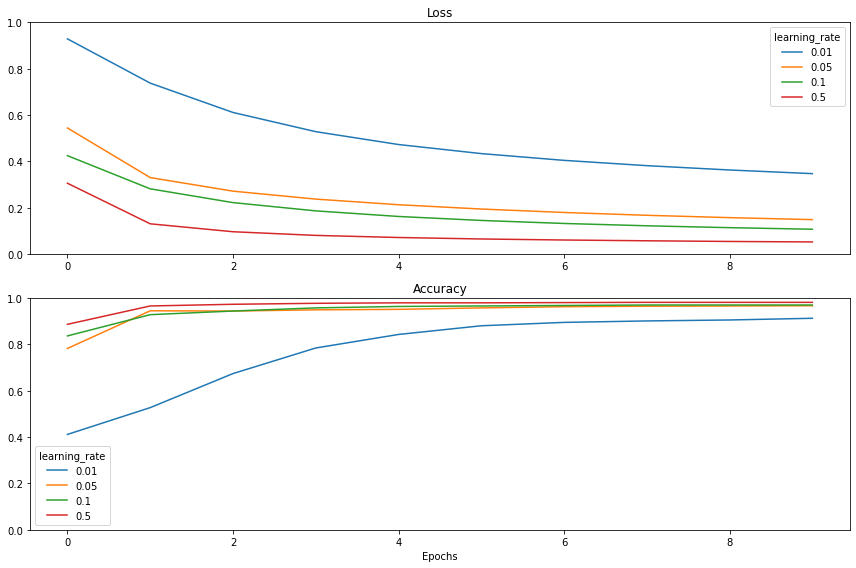

In [54]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [55]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [56]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [57]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.417111  0.810417  1.085738  0.147917  0.687234  0.591667   
1           0.401050  0.819792  0.973177  0.165625  0.661224  0.594792   
2           0.386393  0.836458  0.879377  0.235417  0.636773  0.603125   
3           0.372992  0.850000  0.801915  0.346875  0.613783  0.617708   
4           0.360541  0.859375  0.737931  0.455208  0.592238  0.640625   
5           0.349035  0.871875  0.684690  0.529167  0.572024  0.668750   
6           0.338354  0.878125  0.640156  0.598958  0.553147  0.676042   
7           0.328314  0.885417  0.602446  0.658333  0.535493  0.683333   
8           0.318943  0.890625  0.570247  0.702083  0.519049  0.702083   
9           0.310104  0.892708  0.542543  0.771875  0.503703  0.727083   

batch_size       128            
metric          loss  accuracy  
0           0.839688  0.563542  
1           0.809060  0.573958  
2           0.780284  0.588542  
3           0.752416  0.600000  
4           0.726423  0.612500  
5           0.702356  0.617708  
6           0.679384  0.626042  
7           0.658420  0.634375  
8           0.638342  0.653125  
9           0.619811  0.672917

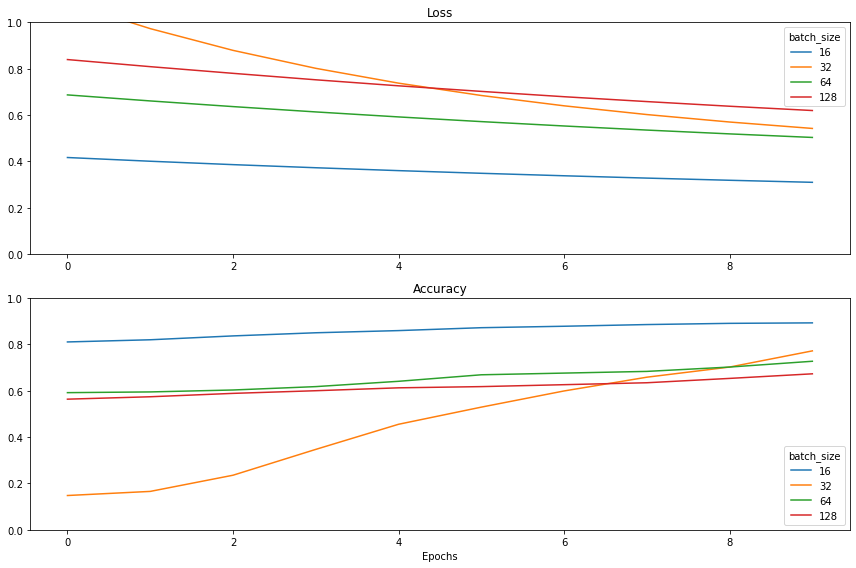

In [58]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [59]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [60]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [61]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

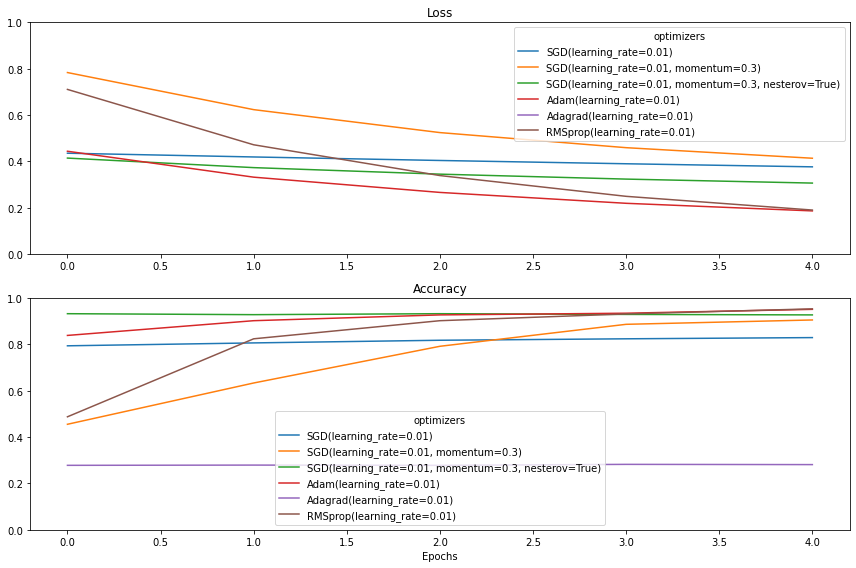

In [62]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [63]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [64]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

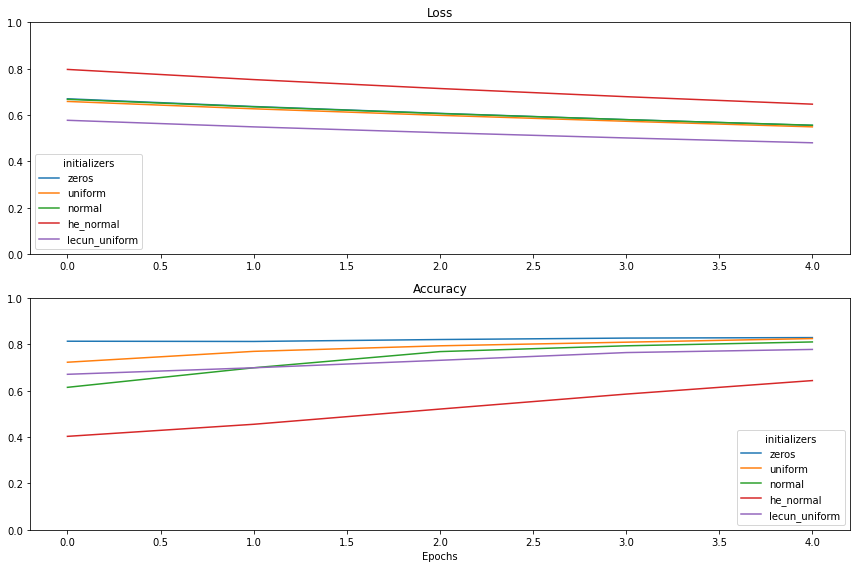

In [65]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [66]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 1s 12ms/step - loss: 0.6074 - accuracy: 0.6280 - val_loss: 0.5716 - val_accuracy: 0.6910
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.8051 - val_loss: 0.3951 - val_accuracy: 0.8646
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2875 - accuracy: 0.8899 - val_loss: 0.2355 - val_accuracy: 0.9097
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9256 - val_loss: 0.1321 - val_accuracy: 0.9583
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.1049 - accuracy: 0.9583 - val_loss: 0.0723 - val_accuracy: 0.9826
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9762 - val_loss: 0.0502 - val_accuracy: 0.9826
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9821 - val_loss: 0.0418 - val_accuracy: 0.9826
Epoch 8/20
42/42 [=

In [67]:
result

[0.026953650638461113, 0.987864077091217]

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.layers

In [70]:
inp = model.layers[0].input
out = model.layers[0].output

In [71]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [72]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [73]:
features_function = K.function([inp], [out])

In [74]:
features_function

<function tensorflow.python.keras.backend.function.<locals>.func(model_inputs)>

In [75]:
features_function([X_test])[0].shape

(412, 2)

In [76]:
features = features_function([X_test])[0]

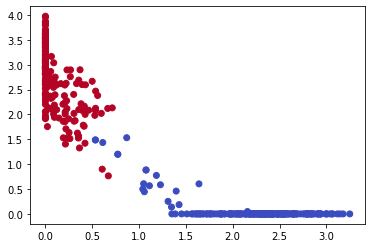

In [77]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [78]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

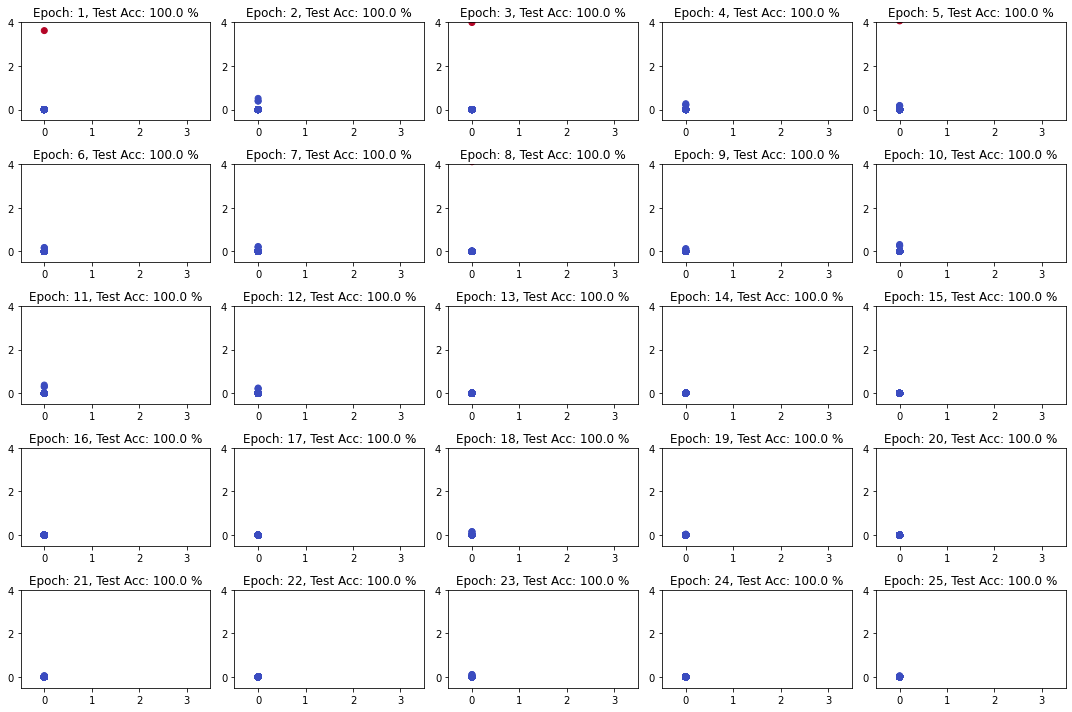

In [81]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard